In [1]:
import pandas as pd

#### PII

In [2]:
df = pd.read_feather("../../data/raw/raw_1632854535/user_metadata_dw_1632854535.feather")

In [3]:
df.head()

,borrower_id,user_id,date_of_birth,sofi_employee_ind,first_name,last_name,current_addr_line_1
0,10297041,16466266,1987-09-11,False,Leigh,Davis,355 N Jonna Ave
1,9645261,15824054,1976-11-01,False,Budsada,Gauthier,602 Papermill Rd
2,13247876,19427512,1997-04-14,False,Tela,Harding,3751 Davis St
3,10935495,17112761,1977-08-25,False,Scott,Jones,45 Hunter Ridge Cove
4,10870804,17048092,1980-08-06,False,Theodore,Baker,1904 Orleans Road


#### Data snapshot for Wanqiao

In [24]:
incumbent_train_path = "s3://sofi-data-science/jxu/money-risk-models/customer-risk-model/data/dev_data/modeling_df_replication_for_governance.feather"
df_train_incumbent = pd.read_feather(incumbent_train_path)

<AxesSubplot:>

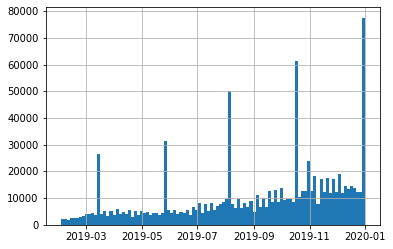

In [25]:
df_train_incumbent.sample_date.hist(bins=100)

In [27]:
df_train_incumbent.columns

Index(['transaction_datetime', 'borrower_id', 'business_account_number',
       'transaction_code', 'transaction_amount', 'external_account_number',
       'real_ending_balance', 'user_id', 'sofi_employee_ind', 'dtc',
       ...
       'latest_acc_bal', 'is_chg_wrt_off_in_90d', 'nr_returns_in_next_90d',
       'bal_after_90d', 'target', 'target_with_restriction', 'indeterminate',
       'sample_date', 'is_static', 'customer-risk-id'],
      dtype='object', length=107)

In [18]:
refit_train_path = "s3://sofi-data-science/jxu/monitoring/customer-risk-v1/2021-06/modeling_df_2020-12-31.parquet"
df_train = pd.read_parquet(refit_train_path)

In [23]:
df_train.shape

(4430837, 91)

<AxesSubplot:>

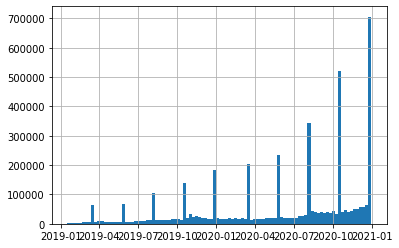

In [21]:
df_train.sample_date.hist(bins=100)

### test

In [4]:
dev_path = "../../data/combined_all_features/combined_1632521410.feather"
df = pd.read_feather(dev_path)

<AxesSubplot:>

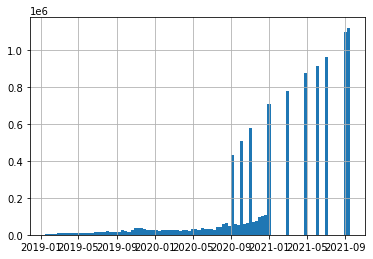

In [5]:
df.sample_date.hist(bins=100)

<AxesSubplot:>

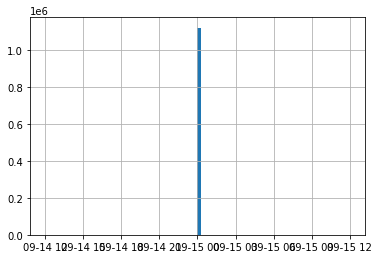

In [7]:
df[df.sample_date==pd.to_datetime("2021-09-15")].sample_date.hist(bins=100)

In [10]:
df = df[df.sample_date==pd.to_datetime("2021-09-15")]
df.shape

(1119646, 91)

In [11]:
df.to_parquet("s3://sofi-data-science/jxu/data_dump/money_customer_risk/20210928-fl-analysis/customer-risk-dev-20210915-static.parquet")